In [1]:
%cd ..

/home/jupyter-tim/ba-tim


In [140]:
from drlqap.taskgenerators import generators
import scipy.optimize
from drlqap.simplesolver import solve_qap_backtracking, solve_qap_maxgreedy, solve_qap_faq, solve_random
from drlqap.gurobi import solve_qap_gurobi
import numpy as np
from drlqap.qap import QAP
from drlqap.evaltools import load_checkpoints
from pathlib import Path
import random

In [26]:
medium_agents = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1'))
small_agents = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1'))
mini_agents = load_checkpoints(Path('runs/dqn_dense_ms_ec_eps0_mini/lr5e-4_s1'))
bi_agents = load_checkpoints(Path('runs/dqn_bi_increasing/lr5e-4_s1'))

runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_0.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_1000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_2000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_3000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_4000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_5000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_6000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_7000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_8000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_9000.pth
runs/dqn_dense_ms_ec_eps0_mediumrandoms/lr5e-4_s1/checkpoint_end.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_0.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_1000.pth
runs/dqn_dense_ms_ec_eps0_smallrandoms/lr5e-4_s1/checkpoint_2000.pth
runs/dqn_dense_ms_ec_eps0_smal

In [93]:
def evaluate(solver, problem, samples):
    if type(problem) == str:
        generator = generators[problem]
    else:
        generator = problem
    qaps = [generator.sample() for i in range(samples)]
    return evaluate_set(solver, qaps)
    
def evaluate_set(solver, problems):
    values = []
    correct = 0
    for qap in problems:
        if qap.compute_value([0,1]) < qap.compute_value([1,0]):
            optimum = [0,1]
        else:
            optimum = [1,0]
        v_solver, assignment = solver(qap)
        v = qap.compute_value(assignment)
        if not np.isclose(v, v_solver):
            print (f"solver outputs incorrect value (got {v_solver}, actual {v})")
        if np.any(np.array(assignment) == np.array(optimum)):
            correct += 1
        values.append(v)
    accuracy = correct/len(problems)
    print(f"accuracy: {accuracy} = {correct}/{len(problems)}; mean: {np.mean(values)}")
    return accuracy

In [50]:
evaluate(solve_qap_backtracking, 'minilinear', 1000)

accuracy: 1.0 = 1000/1000; mean: 0.7568361163139343


In [51]:
evaluate(solve_random, 'minilinear', 1000)

accuracy: 0.483 = 483/1000; mean: 1.016228437423706


In [52]:
evaluate(solve_qap_faq, 'minilinear', 1000)

solver outputs incorrect value (got 0.0, actual 1.188722848892212)
solver outputs incorrect value (got 0.0, actual 1.496435284614563)
solver outputs incorrect value (got 0.0, actual 0.8546656370162964)
solver outputs incorrect value (got 0.0, actual 1.5241189002990723)
solver outputs incorrect value (got 0.0, actual 0.9863247275352478)
solver outputs incorrect value (got 0.0, actual 0.5079357028007507)
solver outputs incorrect value (got 0.0, actual 1.7781691551208496)
solver outputs incorrect value (got 0.0, actual 0.5939823389053345)
solver outputs incorrect value (got 0.0, actual 1.5468294620513916)
solver outputs incorrect value (got 0.0, actual 0.9081140756607056)
solver outputs incorrect value (got 0.0, actual 1.8059412240982056)
solver outputs incorrect value (got 0.0, actual 1.449265480041504)
solver outputs incorrect value (got 0.0, actual 0.6194434762001038)
solver outputs incorrect value (got 0.0, actual 0.12409579753875732)
solver outputs incorrect value (got 0.0, actual 0.

solver outputs incorrect value (got 0.0, actual 1.2295496463775635)
solver outputs incorrect value (got 0.0, actual 1.0381810665130615)
solver outputs incorrect value (got 0.0, actual 1.6526331901550293)
solver outputs incorrect value (got 0.0, actual 1.0212323665618896)
solver outputs incorrect value (got 0.0, actual 0.8731814026832581)
solver outputs incorrect value (got 0.0, actual 1.8238462209701538)
solver outputs incorrect value (got 0.0, actual 1.5752944946289062)
solver outputs incorrect value (got 0.0, actual 0.17702960968017578)
solver outputs incorrect value (got 0.0, actual 1.223461389541626)
solver outputs incorrect value (got 0.0, actual 1.1913113594055176)
solver outputs incorrect value (got 0.0, actual 0.9998568892478943)
solver outputs incorrect value (got 0.0, actual 0.616706132888794)
solver outputs incorrect value (got 0.0, actual 0.6248870491981506)
solver outputs incorrect value (got 0.0, actual 0.725686252117157)
solver outputs incorrect value (got 0.0, actual 1.

solver outputs incorrect value (got 0.0, actual 1.116976022720337)
solver outputs incorrect value (got 0.0, actual 1.6025497913360596)
solver outputs incorrect value (got 0.0, actual 1.251965045928955)
solver outputs incorrect value (got 0.0, actual 0.48406660556793213)
solver outputs incorrect value (got 0.0, actual 0.8928176760673523)
solver outputs incorrect value (got 0.0, actual 1.3747265338897705)
solver outputs incorrect value (got 0.0, actual 0.23623836040496826)
solver outputs incorrect value (got 0.0, actual 1.2844254970550537)
solver outputs incorrect value (got 0.0, actual 0.783585786819458)
solver outputs incorrect value (got 0.0, actual 0.5020455121994019)
solver outputs incorrect value (got 0.0, actual 0.7733113765716553)
solver outputs incorrect value (got 0.0, actual 0.9910167455673218)
solver outputs incorrect value (got 0.0, actual 1.3047263622283936)
solver outputs incorrect value (got 0.0, actual 0.972539484500885)
solver outputs incorrect value (got 0.0, actual 0.

solver outputs incorrect value (got 0.0, actual 0.5537116527557373)
solver outputs incorrect value (got 0.0, actual 1.555720329284668)
solver outputs incorrect value (got 0.0, actual 0.952050507068634)
solver outputs incorrect value (got 0.0, actual 0.8886042833328247)
solver outputs incorrect value (got 0.0, actual 1.3893954753875732)
solver outputs incorrect value (got 0.0, actual 0.39839112758636475)
solver outputs incorrect value (got 0.0, actual 1.106415033340454)
solver outputs incorrect value (got 0.0, actual 0.22804951667785645)
solver outputs incorrect value (got 0.0, actual 1.2880055904388428)
solver outputs incorrect value (got 0.0, actual 1.6346728801727295)
solver outputs incorrect value (got 0.0, actual 1.2467255592346191)
solver outputs incorrect value (got 0.0, actual 1.1806447505950928)
solver outputs incorrect value (got 0.0, actual 1.6041009426116943)
solver outputs incorrect value (got 0.0, actual 1.435098648071289)
solver outputs incorrect value (got 0.0, actual 0.

solver outputs incorrect value (got 0.0, actual 0.9241794943809509)
solver outputs incorrect value (got 0.0, actual 1.6144425868988037)
solver outputs incorrect value (got 0.0, actual 0.6352953910827637)
solver outputs incorrect value (got 0.0, actual 1.4691343307495117)
solver outputs incorrect value (got 0.0, actual 1.4634774923324585)
solver outputs incorrect value (got 0.0, actual 0.8580801486968994)
solver outputs incorrect value (got 0.0, actual 0.5397849678993225)
solver outputs incorrect value (got 0.0, actual 0.8934986591339111)
solver outputs incorrect value (got 0.0, actual 1.142599105834961)
solver outputs incorrect value (got 0.0, actual 1.5352067947387695)
solver outputs incorrect value (got 0.0, actual 1.7866652011871338)
solver outputs incorrect value (got 0.0, actual 0.6263872385025024)
solver outputs incorrect value (got 0.0, actual 0.9841302633285522)
solver outputs incorrect value (got 0.0, actual 1.013549566268921)
solver outputs incorrect value (got 0.0, actual 0.

In [85]:
miniqaps = [generators['minilinear'].sample() for _ in range(250)]

In [86]:
print(miniqaps[0].A)
print(miniqaps[0].B)
print(miniqaps[0].linear_costs)

tensor([[0., 0.],
        [0., 0.]])
tensor([[0., 0.],
        [0., 0.]])
tensor([[0.5855, 0.1218],
        [0.8692, 0.5714]])


In [87]:
evaluate_set(mini_agents[1].solve, miniqaps)

accuracy: 0.956 = 239/250; mean: 0.8167479038238525


In [88]:
evaluate_set(small_agents[1].solve, miniqaps)

accuracy: 0.572 = 143/250; mean: 0.996189534664154


In [89]:
evaluate_set(medium_agents[1].solve, miniqaps)

accuracy: 0.46 = 115/250; mean: 1.061065912246704


In [90]:
evaluate_set(bi_agents[1].solve, miniqaps)

accuracy: 0.908 = 227/250; mean: 0.8273810148239136


# n=2 Accuracy over time

In [92]:
import matplotlib.pyplot as plt

In [94]:
accuracies = [evaluate_set(agent.solve, miniqaps) for agent in bi_agents]

accuracy: 0.42 = 105/250; mean: 1.0951244831085205
accuracy: 0.908 = 227/250; mean: 0.8273810148239136
accuracy: 0.916 = 229/250; mean: 0.841330349445343
accuracy: 0.952 = 238/250; mean: 0.8199734091758728
accuracy: 0.936 = 234/250; mean: 0.8246852159500122
accuracy: 0.912 = 228/250; mean: 0.8283387422561646
accuracy: 0.928 = 232/250; mean: 0.8219640851020813
accuracy: 0.904 = 226/250; mean: 0.835901141166687
accuracy: 0.9 = 225/250; mean: 0.8346495032310486
accuracy: 0.844 = 211/250; mean: 0.8495585322380066
accuracy: 0.828 = 207/250; mean: 0.8665340542793274
accuracy: 0.724 = 181/250; mean: 0.9041983485221863
accuracy: 0.468 = 117/250; mean: 1.0453875064849854
accuracy: 0.432 = 108/250; mean: 1.0747138261795044
accuracy: 0.436 = 109/250; mean: 1.0839579105377197
accuracy: 0.44 = 110/250; mean: 1.073501467704773


Text(0.5, 1.0, 'Accuracy on n=2 LAP for DQN agent trained on n=2..16 QAPs sequentially')

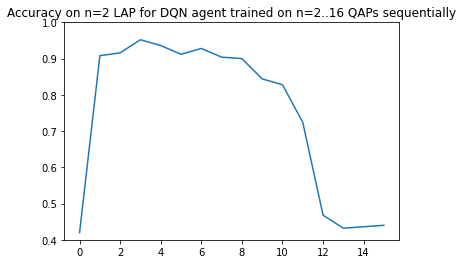

In [274]:
plt.plot(accuracies)
plt.ylim(0.4,1)
plt.title("Accuracy on n=2 LAP for DQN agent trained on n=2..16 QAPs sequentially")

In [96]:
sm_accuracies = [evaluate_set(agent.solve, miniqaps) for agent in small_agents]

accuracy: 0.452 = 113/250; mean: 1.0635380744934082
accuracy: 0.572 = 143/250; mean: 0.996189534664154
accuracy: 0.552 = 138/250; mean: 1.0030572414398193
accuracy: 0.588 = 147/250; mean: 0.9748347997665405
accuracy: 0.66 = 165/250; mean: 0.9185603260993958
accuracy: 0.792 = 198/250; mean: 0.8655710220336914
accuracy: 0.828 = 207/250; mean: 0.8501061201095581
accuracy: 0.804 = 201/250; mean: 0.8601248860359192
accuracy: 0.776 = 194/250; mean: 0.8669750094413757
accuracy: 0.728 = 182/250; mean: 0.8987475633621216
accuracy: 0.644 = 161/250; mean: 0.9675911664962769


Text(0.5, 1.0, 'Accuracy on n=2 LAP for DQN agent trained on n=8 QAP')

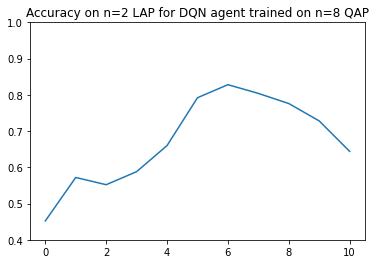

In [275]:
plt.plot(sm_accuracies)
plt.ylim(0.4,1)
plt.title("Accuracy on n=2 LAP for DQN agent trained on n=8 QAP")

In [102]:
md_accuracies = [evaluate_set(agent.solve, miniqaps) for agent in medium_agents]

accuracy: 0.452 = 113/250; mean: 1.0625865459442139
accuracy: 0.46 = 115/250; mean: 1.061065912246704
accuracy: 0.636 = 159/250; mean: 0.9758407473564148
accuracy: 0.488 = 122/250; mean: 1.04490065574646
accuracy: 0.5 = 125/250; mean: 1.0379841327667236
accuracy: 0.54 = 135/250; mean: 1.0160375833511353
accuracy: 0.568 = 142/250; mean: 1.0059295892715454
accuracy: 0.58 = 145/250; mean: 0.9930083155632019
accuracy: 0.604 = 151/250; mean: 0.9717354774475098
accuracy: 0.528 = 132/250; mean: 1.0208324193954468
accuracy: 0.568 = 142/250; mean: 0.9968685507774353


Text(0.5, 1.0, 'Accuracy on n=2 LAP for DQN agent trained on n=8 QAP')

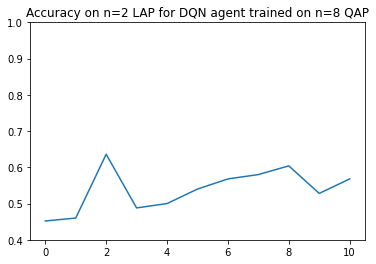

In [276]:
plt.plot(md_accuracies)
plt.ylim(0.4,1)
plt.title("Accuracy on n=2 LAP for DQN agent trained on n=8 QAP")

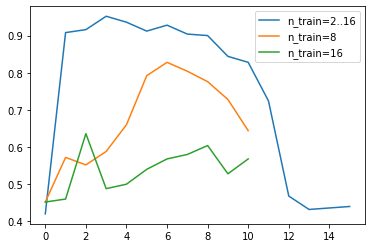

In [108]:
plt.plot(accuracies, label="n_train=2..16")
plt.plot(sm_accuracies, label="n_train=8")
plt.plot(md_accuracies, label="n_train=16")
plt.legend()

# Impact of scaling of values on performance

In [169]:
def scale_linear(qap, factor, shift):
    return QAP(
        qap.A,
        qap.B,
        qap.linear_costs * factor + shift,
        qap.fixed_cost
    )

def scale_set_linear(qaps, factor, shift):
    return [scale_linear(q, factor, shift) for q in qaps]

In [153]:
factors = np.linspace(0.05, 10, 21)
scaling_accuracies = [evaluate_set(medium_agents[-1].solve, scale_set_linear(miniqaps, f, 0)) for f in factors]

accuracy: 0.556 = 139/250; mean: 0.050591155886650085
accuracy: 0.544 = 136/250; mean: 0.5533145666122437
accuracy: 0.54 = 135/250; mean: 1.0566455125808716
accuracy: 0.516 = 129/250; mean: 1.5756295919418335
accuracy: 0.524 = 131/250; mean: 2.0860209465026855
accuracy: 0.52 = 130/250; mean: 2.596506357192993
accuracy: 0.528 = 132/250; mean: 3.0890746116638184
accuracy: 0.528 = 132/250; mean: 3.5988640785217285
accuracy: 0.524 = 131/250; mean: 4.117345809936523
accuracy: 0.524 = 131/250; mean: 4.6256279945373535
accuracy: 0.516 = 129/250; mean: 5.1673583984375
accuracy: 0.516 = 129/250; mean: 5.678952693939209
accuracy: 0.504 = 126/250; mean: 6.244963645935059
accuracy: 0.5 = 125/250; mean: 6.769221782684326
accuracy: 0.5 = 125/250; mean: 7.28593635559082
accuracy: 0.5 = 125/250; mean: 7.802651405334473
accuracy: 0.5 = 125/250; mean: 8.319366455078125
accuracy: 0.5 = 125/250; mean: 8.836080551147461
accuracy: 0.5 = 125/250; mean: 9.352794647216797
accuracy: 0.5 = 125/250; mean: 9.86950

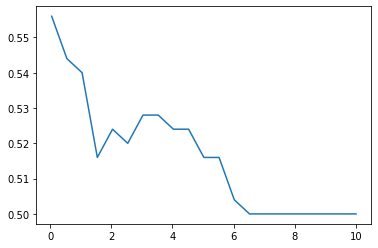

In [154]:
plt.plot(factors, scaling_accuracies)

# QAP reduced from n=16 to n=2

In [266]:
def generate_reduced_qap():
    qap = generators['medium_random_graphs'].sample()
    while qap.size > 2:
        qap = qap.create_subproblem_for_assignment(0, 0)
        qap.fixed_cost = 0
    return qap

In [267]:
qap = generate_reduced_qap()
print(qap.A)
print(qap.B)
print(qap.linear_costs)

tensor([[0.0000, 0.0759],
        [0.0759, 0.0000]])
tensor([[0.0000, 0.2054],
        [0.2054, 0.0000]])
tensor([[4.4245, 4.6711],
        [6.2774, 6.8920]])


In [268]:
print(qap.compute_value([0,1]))
print(qap.compute_value([1,0]))
print(medium_agents[-1].solve(qap))

tensor(11.3477)
tensor(10.9797)
(10.979748725891113, [1, 0])


In [269]:
reduced_qaps = [generate_reduced_qap() for i in range(250)]

In [271]:
reduced_bi_accs = [evaluate_set(agent.solve, reduced_qaps) for agent in bi_agents]

accuracy: 0.544 = 136/250; mean: 14.312276840209961
accuracy: 0.748 = 187/250; mean: 14.063860893249512
accuracy: 0.732 = 183/250; mean: 14.082088470458984
accuracy: 0.816 = 204/250; mean: 13.998058319091797
accuracy: 0.908 = 227/250; mean: 13.964000701904297
accuracy: 0.912 = 228/250; mean: 13.951117515563965
accuracy: 0.892 = 223/250; mean: 13.95849895477295
accuracy: 0.924 = 231/250; mean: 13.932437896728516
accuracy: 0.932 = 233/250; mean: 13.931495666503906
accuracy: 0.952 = 238/250; mean: 13.931696891784668
accuracy: 0.932 = 233/250; mean: 13.94694709777832
accuracy: 0.904 = 226/250; mean: 13.964089393615723
accuracy: 0.964 = 241/250; mean: 13.932485580444336
accuracy: 0.892 = 223/250; mean: 13.95949649810791
accuracy: 0.872 = 218/250; mean: 13.962431907653809
accuracy: 0.884 = 221/250; mean: 13.956496238708496


In [272]:
reduced_sm_accs = [evaluate_set(agent.solve, reduced_qaps) for agent in small_agents]
reduced_md_accs = [evaluate_set(agent.solve, reduced_qaps) for agent in medium_agents]

accuracy: 0.592 = 148/250; mean: 14.258968353271484
accuracy: 0.56 = 140/250; mean: 14.29992961883545
accuracy: 0.592 = 148/250; mean: 14.254145622253418
accuracy: 0.564 = 141/250; mean: 14.295222282409668
accuracy: 0.592 = 148/250; mean: 14.250823974609375
accuracy: 0.724 = 181/250; mean: 14.110882759094238
accuracy: 0.8 = 200/250; mean: 14.024674415588379
accuracy: 0.92 = 230/250; mean: 13.95267391204834
accuracy: 0.92 = 230/250; mean: 13.951781272888184
accuracy: 0.916 = 229/250; mean: 13.94840145111084
accuracy: 0.956 = 239/250; mean: 13.931604385375977
accuracy: 0.508 = 127/250; mean: 14.426417350769043
accuracy: 0.44 = 110/250; mean: 14.55100154876709
accuracy: 0.564 = 141/250; mean: 14.308843612670898
accuracy: 0.576 = 144/250; mean: 14.276758193969727
accuracy: 0.56 = 140/250; mean: 14.29992961883545
accuracy: 0.564 = 141/250; mean: 14.296407699584961
accuracy: 0.556 = 139/250; mean: 14.319056510925293
accuracy: 0.56 = 140/250; mean: 14.29992961883545
accuracy: 0.564 = 141/250;

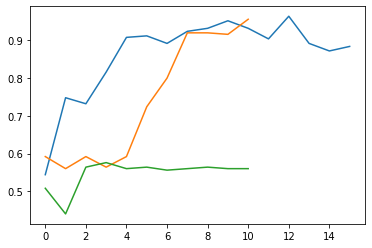

In [273]:
plt.plot(reduced_bi_accs)
plt.plot(reduced_sm_accs)
plt.plot(reduced_md_accs)